<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB
LogisticRegression(max_iter=1000)
[[198  20  96 129]
 [161  35 151  67]
 [ 87  20 240  61]
 [103  10  53 328]]


0.4553723706651506

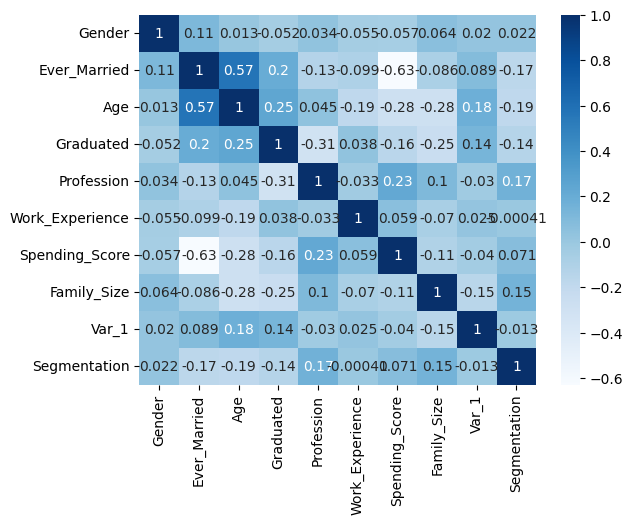

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


testdata = pd.read_csv("Test.csv")
traindata = pd.read_csv("Train.csv")
data = pd.concat([testdata,traindata])
data

data.shape
data.info()
data.isnull( ).sum()
data.dropna(inplace=True)
data
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data
data.drop('ID',axis=1,inplace=True)
data

data['Segmentation'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Segmentation'])
data['Segmentation'] = label_encoder.fit_transform(data["Segmentation"])
data
data['Gender'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Gender'])
data['Gender'] = label_encoder.fit_transform(data["Gender"])

data['Ever_Married'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Ever_Married'])
data['Ever_Married'] = label_encoder.fit_transform(data["Ever_Married"])

data['Graduated'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Graduated'])
data['Graduated'] = label_encoder.fit_transform(data["Graduated"])

data['Profession'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Profession'])
data['Profession'] = label_encoder.fit_transform(data["Profession"])

data['Spending_Score'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Spending_Score'])
data['Spending_Score'] = label_encoder.fit_transform(data["Spending_Score"])

data['Var_1'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Var_1'])
data['Var_1'] = label_encoder.fit_transform(data["Var_1"])
data
data.corr()
sns.heatmap(data.corr(), annot=True, cmap="Blues")


X = data.drop(["Segmentation"],axis=1)
Y = data["Segmentation"]
X
Y

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

X_train.shape,X_test.shape
Y_train.shape,Y_test.shape

classify_model = LogisticRegression(max_iter=1000)
print(classify_model.fit(X_train,Y_train))

preds = classify_model.predict(X_test)
preds


print(confusion_matrix(Y_test,preds))

accuracy_score(Y_test,preds)




